# Assignment

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the data set

In [2]:
import pandas as pd
df = pd.read_csv('Machine Failure Train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### Seperate X and Y

In [5]:
X = df.drop(columns=['id','Product ID', 'Machine failure'])
Y = df[['Machine failure']]

In [6]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [7]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


### Seperate the Cat and Con

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

### Preprocssing of the Data

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

### Feature selection pipeline

In [10]:
num_pipe1 = Pipeline(steps= [('imputer', SimpleImputer(strategy='mean')), 
                        ('scalar', StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ordinal', OrdinalEncoder())])

pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)])


In [11]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [12]:
cols = pre1.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [13]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


### Mutual information score

In [14]:
from sklearn.feature_selection import mutual_info_classif
Mi = mutual_info_classif(X_pre, Y)
Mi

array([0.0051945 , 0.00219233, 0.01910461, 0.02014167, 0.00714146,
       0.00829077, 0.02476845, 0.01082164, 0.0196158 , 0.00162131,
       0.01299114])

In [15]:
Mi = pd.Series(Mi)
Mi.index = X_pre.columns
Mi = Mi.sort_values(ascending=False)
Mi

num__HDF                        0.024768
num__Torque [Nm]                0.020142
num__OSF                        0.019616
num__Rotational speed [rpm]     0.019105
cat__Type                       0.012991
num__PWF                        0.010822
num__TWF                        0.008291
num__Tool wear [min]            0.007141
num__Air temperature [K]        0.005194
num__Process temperature [K]    0.002192
num__RNF                        0.001621
dtype: float64

<Axes: title={'center': 'Feature_Importance'}>

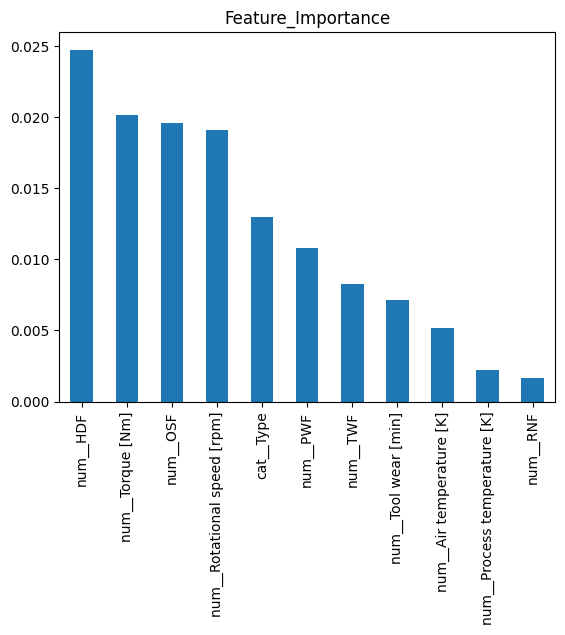

In [16]:
Mi.plot(kind='bar', title='Feature_Importance')

### Final Preprocessing Pipline

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
num_pipe2 = Pipeline(steps= [('imputer', SimpleImputer(strategy='mean')), 
                        ('scalar', StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con),
                          ('cat', cat_pipe2, cat)])

In [19]:
X_pre2 = pre2.fit_transform(X)
X_pre2

array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [20]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [21]:
X_pre2 = pd.DataFrame(X_pre2, columns=final_cols)
X_pre2.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [22]:
X_pre2.shape

(136429, 13)

### Test Train Split

In [23]:
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain , ytest = train_test_split(X_pre2, Y, test_size=0.2, random_state=35)

### Algo Evalution

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [25]:
dct = {'Logisitc' : LogisticRegression(),
       'Decision Tree' : DecisionTreeClassifier(),
       'RandomForest': RandomForestClassifier(),
       'Gradient Boosting' : GradientBoostingClassifier()}

In [26]:
dct.items()

dict_items([('Logisitc', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('Gradient Boosting', GradientBoostingClassifier())])

In [27]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

tr = []
ts = []
tr_cv = []

for name, model in dct.items():
    model.fit(xtrain, ytrain)
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)

    tr_f1 = f1_score(ytrain, ypred_tr)
    ts_f1 = f1_score(ytest, ypred_ts)

    tr.append(tr_f1)
    ts.append(ts_f1)

    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_cv = scores.mean()
    tr_cv.append(f1_cv)

In [28]:
list(dct.keys())

['Logisitc', 'Decision Tree', 'RandomForest', 'Gradient Boosting']

In [29]:
eval_dct = {'Model':list(dct.keys()),
            'Train_f1':tr,
            'Test_f1':ts,
            'Train_CV':tr_cv}

In [30]:
eval_df = pd.DataFrame(eval_dct)
eval_df

,Model,Train_f1,Test_f1,Train_CV
0,Logisitc,0.860957,0.869684,0.860363
1,Decision Tree,0.996244,0.737084,0.746470
2,RandomForest,0.996248,0.865306,0.856887
3,Gradient Boosting,0.870376,0.869210,0.855617


In [31]:
eval_df.sort_values(by='Test_f1', ascending=False)

,Model,Train_f1,Test_f1,Train_CV
0,Logisitc,0.860957,0.869684,0.860363
3,Gradient Boosting,0.870376,0.869210,0.855617
2,RandomForest,0.996248,0.865306,0.856887
1,Decision Tree,0.996244,0.737084,0.746470


### Logistic regression Model with Hyperparameter tuning

In [32]:
params =  {'C':[0.01, 0.1, 10, 50, 100, 500, 1000]}

In [33]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params, cv=5, scoring='f1')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 10, 50, 100, 500,
                                              1000]},
                   scoring='f1')

In [34]:
rscv.best_params_

{'C': 0.01}

In [35]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=0.01)

### Checking Accuracy in Training and Testing

In [36]:
best_lr.score(xtrain, ytrain)

0.9960877014558881

In [37]:
best_lr.score(xtest, ytest)

0.9965550098951843

### Predication of Train and Test Value

In [38]:
ypred_tr = best_lr.predict(xtrain)
ypred_ts = best_lr.predict(xtest)

In [39]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [40]:
ytrain.head()

,Machine failure
66141,0
70174,0
128750,0
19269,0
111917,0


In [41]:
ypred_ts[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [42]:
ytest.head()

,Machine failure
106964,0
91881,0
83930,0
83021,0
130572,0


### Confusion Matix

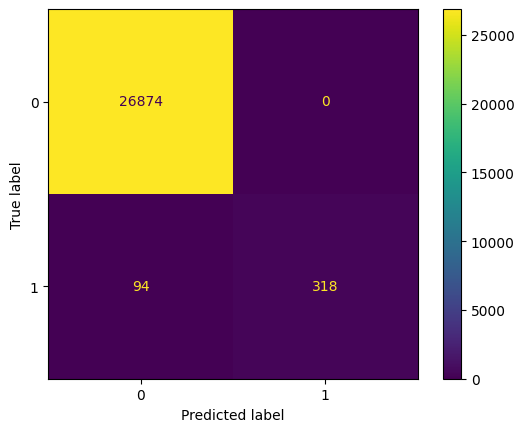

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_lr.classes_)
cfd.plot()

### Print Classification Report

In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26874
           1       1.00      0.77      0.87       412

    accuracy                           1.00     27286
   macro avg       1.00      0.89      0.93     27286
weighted avg       1.00      1.00      1.00     27286



### Plotting ROC AUC Curve for Testing

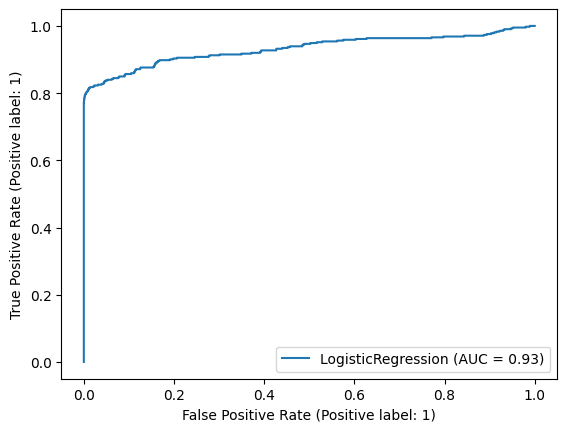

In [45]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr, xtest, ytest)

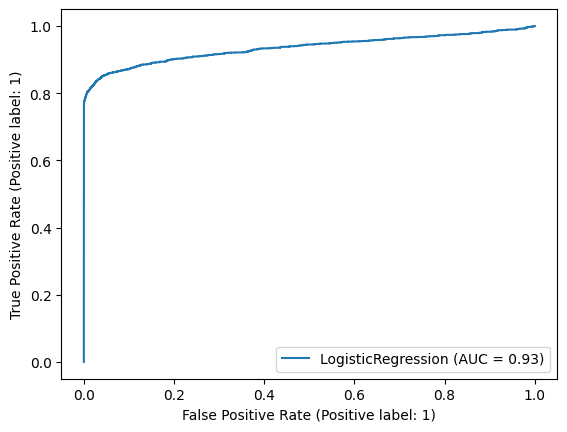

In [46]:
RocCurveDisplay.from_estimator(best_lr, xtrain, ytrain)

### Calculating the Area Under the Curve

In [47]:
yprob_ts = best_lr.predict_proba(xtest)[:,1]
yprob_ts

array([0.00319147, 0.003335  , 0.00161034, ..., 0.0022335 , 0.0027518 ,
       0.00148013])

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, yprob_ts)

0.9317947527151158

In [49]:
scores = cross_val_score(best_lr, xtrain, ytrain, scoring='roc_auc')
scores.mean()

0.9336282759282518

### Prediciting the Test Data

In [50]:
xnew = pd.read_csv('Machine Failure Test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [51]:
xnew.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [52]:
xnew_pre = pre2.transform(xnew)
xnew_pre

array([[ 1.30875929,  1.12544438, -0.15375311, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.76447734,  1.3887435 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77177165,  0.33131689,  0.03365302, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-2.2890579 , -2.70080627, -0.13933725, ...,  0.        ,
         1.        ,  0.        ],
       [-0.9465888 , -1.54571174,  0.09852438, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.95314446,  2.06395869,  0.09852438, ...,  0.        ,
         1.        ,  0.        ]])

In [53]:
xnew_pre = pd.DataFrame(xnew_pre, columns=final_cols)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [54]:
preds = best_lr.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
probs = best_lr.predict_proba(xnew_pre)[:,1]
probs

array([0.00291431, 0.00140245, 0.00307561, ..., 0.00308253, 0.00266229,
       0.00310616])

### Final Dataframe

In [56]:
df_final = xnew[['id']]
df_final.head()

,id
0,136429
1,136430
2,136431
3,136432
4,136433


In [57]:
df_final['Machine Failure'] = preds
df_final['Prob'] = probs
df_final.head()

,id,Machine Failure,Prob
0,136429,0,0.002914
1,136430,0,0.001402
2,136431,0,0.003076
3,136432,0,0.003976
4,136433,0,0.004563


<Axes: xlabel='Machine Failure'>

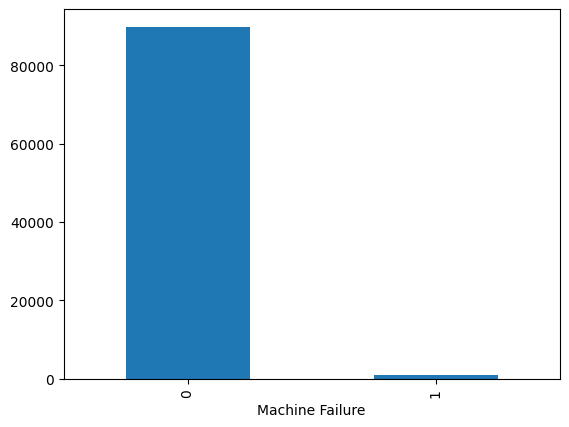

In [58]:
df_final['Machine Failure'].value_counts().plot(kind='bar')

In [59]:
df_final.to_csv('Final_Project_Submission.csv', index=False)